In [3]:
import pandas as pd

# Load the dataset from the working GitHub link
url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
df = pd.read_csv(url, sep=';')

# Check shape and preview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Dataset summary
df.info()

# Basic statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [8]:
# Select relevant features
features = ['sex', 'age', 'address', 'studytime', 'failures', 'schoolsup', 'famsup',
            'paid', 'activities', 'higher', 'internet', 'romantic', 'absences', 'G1', 'G2']
target = 'G3'

X = df[features]
y = df[target]


In [9]:
X.head()


,sex,age,address,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,absences,G1,G2
0,F,18,U,2,0,yes,no,no,no,yes,no,no,6,5,6
1,F,17,U,2,0,no,yes,no,no,yes,yes,no,4,5,5
2,F,15,U,2,3,yes,no,yes,no,yes,yes,no,10,7,8
3,F,15,U,3,0,no,yes,yes,yes,yes,yes,yes,2,15,14
4,F,16,U,2,0,no,yes,yes,no,yes,no,no,4,6,10


In [10]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Show encoded data
X_encoded.head()


,age,studytime,failures,absences,G1,G2,sex_M,address_U,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes
0,18,2,0,6,5,6,False,True,True,False,False,False,True,False,False
1,17,2,0,4,5,5,False,True,False,True,False,False,True,True,False
2,15,2,3,10,7,8,False,True,True,False,True,False,True,True,False
3,15,3,0,2,15,14,False,True,False,True,True,True,True,True,True
4,16,2,0,4,6,10,False,True,False,True,True,False,True,False,False


In [11]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Confirm the shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (316, 15)
Test set: (79, 15)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 5.0216136374199944
R² Score: 0.7551035327170148


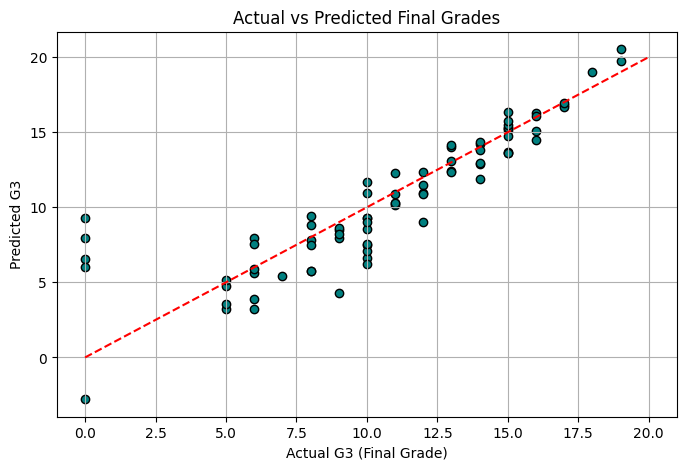

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', edgecolor='k')
plt.plot([0, 20], [0, 20], 'r--')  # reference line
plt.xlabel("Actual G3 (Final Grade)")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades")
plt.grid(True)
plt.show()
